In [1]:
# calling database form csv

import pandas as pd
import sys, os
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))


db = pd.read_csv('../../data/database/database.csv')
db.head()

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,power,WF,FR[%],Q[W],alpha,beta,Te_mean[C],Tc_mean[C],Te_std[C],Tc_std[C]
0,11:32:06,04/04/2024,36.3,36.7,36.1,36.0,35.9,33.5,33.2,33.3,...,40.7,DI water,60.0,40.0,90.0,0.0,36.20,32.625,0.316228,1.422146
1,11:32:08,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.3,...,40.8,DI water,60.0,40.0,90.0,0.0,36.42,32.625,0.327109,1.422146
2,11:32:09,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,40.8,DI water,60.0,40.0,90.0,0.0,36.42,32.600,0.327109,1.407125
3,11:32:10,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,40.8,DI water,60.0,40.0,90.0,0.0,36.42,32.600,0.327109,1.407125
4,11:32:12,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,40.7,DI water,60.0,40.0,90.0,0.0,36.42,32.600,0.327109,1.407125


In [2]:
df_FR60_Q100 = db[(db['FR[%]'] == 60) & (db['Q[W]'] == 120)]
df_FR60_Q100

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,power,WF,FR[%],Q[W],alpha,beta,Te_mean[C],Tc_mean[C],Te_std[C],Tc_std[C]
8353,16:32:36,04/04/2024,39.2,39.4,38.7,38.5,37.7,32.0,31.6,31.6,...,120.9,DI water,60.0,120.0,90.0,0.0,38.70,31.025,0.667083,1.429161
8354,16:32:37,04/04/2024,39.2,39.4,38.7,38.5,37.7,32.0,31.6,31.7,...,120.5,DI water,60.0,120.0,90.0,0.0,38.70,31.050,0.667083,1.443376
8355,16:32:39,04/04/2024,39.2,39.4,38.7,38.5,37.7,32.0,31.6,31.7,...,120.6,DI water,60.0,120.0,90.0,0.0,38.70,31.050,0.667083,1.443376
8356,16:32:40,04/04/2024,39.2,39.4,38.7,38.5,37.7,32.0,31.6,31.7,...,120.8,DI water,60.0,120.0,90.0,0.0,38.70,31.050,0.667083,1.443376
8357,16:32:44,04/04/2024,39.8,40.1,39.3,39.1,38.4,32.0,31.6,31.7,...,120.3,DI water,60.0,120.0,90.0,0.0,39.34,31.050,0.658027,1.443376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448,17:34:50,04/04/2024,94.4,96.2,96.7,98.2,98.2,73.8,92.2,93.1,...,120.2,DI water,60.0,120.0,90.0,0.0,96.74,90.400,1.583667,12.006942
10449,17:34:52,04/04/2024,94.4,96.2,96.7,98.2,98.2,73.8,92.2,89.4,...,120.1,DI water,60.0,120.0,90.0,0.0,96.74,89.525,1.583667,11.944699
10450,17:34:53,04/04/2024,94.5,96.3,97.0,98.5,98.2,73.8,92.2,89.4,...,120.2,DI water,60.0,120.0,90.0,0.0,96.90,89.525,1.610900,11.944699
10451,17:34:55,04/04/2024,94.5,96.3,97.0,98.5,97.9,74.1,92.5,88.9,...,120.2,DI water,60.0,120.0,90.0,0.0,96.84,89.550,1.554992,11.842719


In [3]:

# from zenml.client import Client

# artifact = Client().get_artifact_version('909b4d1a-4555-4310-92f4-3a213e7573b9')
# df = artifact.load()

In [4]:
df = db.copy()

FR 60.0
Q 40.0
alpha 90.0, beta 0.0
Q 60.0
alpha 90.0, beta 0.0
Q 80.0
alpha 90.0, beta 0.0
Q 100.0
alpha 90.0, beta 0.0
Q 120.0
alpha 90.0, beta 0.0


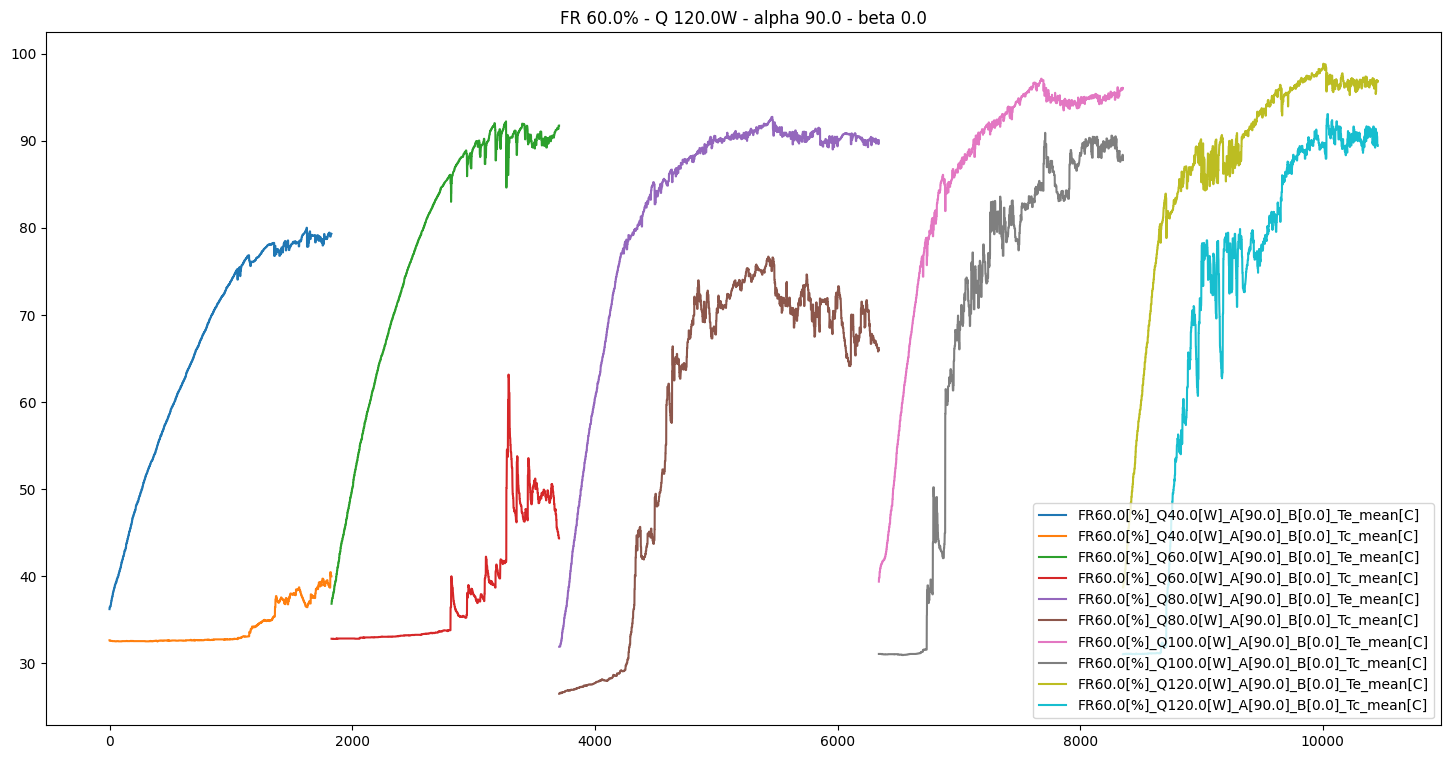

In [5]:
frs = df['FR[%]'].unique()
qs = df['Q[W]'].unique()
alphas = df['alpha'].unique()
betas = df['beta'].unique()
betas

import matplotlib.pyplot as plt

# Assuming frs, qs, alphas, betas are defined and df is your DataFrame
plt.figure(figsize=(18, 9))
for fr in frs:
    print(f'FR {fr}')
    for q in qs:
        print(f'Q {q}')
        for a in alphas:
            for b in betas:
                print(f'alpha {a}, beta {b}')
                
                # Filter the dataframe
                df_ = df[(df['FR[%]'] == fr) & (df['Q[W]'] == q) & (df['alpha'] == a) & (df['beta'] == b)]
                # df_.reset_index(inplace=True)
                
                if not df_.empty:
                    # Plotting
                    # plt.figure(figsize=(18, 6))
                    plt.plot(df_['Te_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Te_mean[C]')
                    plt.plot(df_['Tc_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Tc_mean[C]')
plt.legend()
plt.title(f'FR {fr}% - Q {q}W - alpha {a} - beta {b}')
plt.show()


In [6]:
df

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,power,WF,FR[%],Q[W],alpha,beta,Te_mean[C],Tc_mean[C],Te_std[C],Tc_std[C]
0,11:32:06,04/04/2024,36.3,36.7,36.1,36.0,35.9,33.5,33.2,33.3,...,40.7,DI water,60.0,40.0,90.0,0.0,36.20,32.625,0.316228,1.422146
1,11:32:08,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.3,...,40.8,DI water,60.0,40.0,90.0,0.0,36.42,32.625,0.327109,1.422146
2,11:32:09,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,40.8,DI water,60.0,40.0,90.0,0.0,36.42,32.600,0.327109,1.407125
3,11:32:10,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,40.8,DI water,60.0,40.0,90.0,0.0,36.42,32.600,0.327109,1.407125
4,11:32:12,04/04/2024,36.6,36.9,36.3,36.2,36.1,33.5,33.2,33.2,...,40.7,DI water,60.0,40.0,90.0,0.0,36.42,32.600,0.327109,1.407125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448,17:34:50,04/04/2024,94.4,96.2,96.7,98.2,98.2,73.8,92.2,93.1,...,120.2,DI water,60.0,120.0,90.0,0.0,96.74,90.400,1.583667,12.006942
10449,17:34:52,04/04/2024,94.4,96.2,96.7,98.2,98.2,73.8,92.2,89.4,...,120.1,DI water,60.0,120.0,90.0,0.0,96.74,89.525,1.583667,11.944699
10450,17:34:53,04/04/2024,94.5,96.3,97.0,98.5,98.2,73.8,92.2,89.4,...,120.2,DI water,60.0,120.0,90.0,0.0,96.90,89.525,1.610900,11.944699
10451,17:34:55,04/04/2024,94.5,96.3,97.0,98.5,97.9,74.1,92.5,88.9,...,120.2,DI water,60.0,120.0,90.0,0.0,96.84,89.550,1.554992,11.842719


In [7]:
df.select_dtypes(include='object').columns.to_list()

['TIME', 'DATE', 'WF']

In [8]:
# Ensure Te_mean[C] and Tc_mean[C] are numeric
df['Te_mean[C]'] = pd.to_numeric(df['Te_mean[C]'], errors='coerce')
df['Tc_mean[C]'] = pd.to_numeric(df['Tc_mean[C]'], errors='coerce')

# Identify the object column automatically
object_column = df.select_dtypes(include='object').columns

# df_n = df.drop(columns=df.select_dtypes(include='object').columns, inplace=True)


# # Group by 'Te_mean[C]' and calculate the mean of numeric columns
df_numeric_mean = df.drop(columns=object_column)\
                    .groupby('Te_mean[C]')\
                    .agg('mean')

# # Extract the first value of the identified object column for each group
df_object = df.groupby('Te_mean[C]')[object_column].first()

# # Combine the mean numeric columns with the object column
df_mean = pd.concat([df_numeric_mean, df_object], axis=1).reset_index()
# df.drop(columns=df.select_dtypes(include='object').columns, inplace=True)
# # df.reset_index(inplace=True)
# df_mean = df.sort_values('Te_mean[C]').groupby(['Te_mean[C]'], as_index=False).mean()

df_mean

,Te_mean[C],TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,TC_9,...,FR[%],Q[W],alpha,beta,Tc_mean[C],Te_std[C],Tc_std[C],TIME,DATE,WF
0,31.88,31.9,32.2,31.6,31.7,32.0,27.300000,26.800000,27.100000,24.771429,...,60.0,80.0,90.0,0.0,26.492857,0.238747,1.165876,14:07:55,21/03/2024,DI water
1,31.90,31.9,32.2,31.6,31.7,32.1,27.400000,26.900000,27.100000,24.800000,...,60.0,80.0,90.0,0.0,26.550000,0.254951,1.184624,14:08:07,21/03/2024,DI water
2,31.94,32.1,32.2,31.6,31.7,32.1,27.400000,26.900000,27.100000,24.800000,...,60.0,80.0,90.0,0.0,26.550000,0.270185,1.184624,14:08:15,21/03/2024,DI water
3,32.16,32.1,32.5,31.9,32.0,32.3,27.400000,27.000000,27.200000,24.800000,...,60.0,80.0,90.0,0.0,26.600000,0.240832,1.211060,14:08:17,21/03/2024,DI water
4,32.20,32.2,32.6,31.9,32.0,32.3,27.400000,27.000000,27.200000,24.800000,...,60.0,80.0,90.0,0.0,26.600000,0.273861,1.211060,14:08:20,21/03/2024,DI water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,98.58,98.5,97.5,98.1,99.0,99.8,83.900000,93.600000,75.833333,104.266667,...,60.0,120.0,90.0,0.0,89.400000,0.875785,12.290040,17:20:59,04/04/2024,DI water
2113,98.60,98.6,97.7,98.3,99.9,98.5,84.140000,93.920000,76.340000,104.200000,...,60.0,120.0,90.0,0.0,89.650000,0.806226,12.075732,17:21:10,04/04/2024,DI water
2114,98.78,98.7,97.9,98.4,100.1,98.8,83.266667,94.166667,72.266667,104.600000,...,60.0,120.0,90.0,0.0,88.575000,0.816701,13.934566,17:21:26,04/04/2024,DI water
2115,98.80,98.8,97.9,98.4,100.1,98.8,82.800000,94.500000,71.900000,104.900000,...,60.0,120.0,90.0,0.0,88.525000,0.815475,14.294609,17:21:37,04/04/2024,DI water


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10453 entries, 0 to 10452
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIME              10453 non-null  object 
 1   DATE              10453 non-null  object 
 2   TC_1              10453 non-null  float64
 3   TC_2              10453 non-null  float64
 4   TC_3              10453 non-null  float64
 5   TC_4              10453 non-null  float64
 6   TC_5              10453 non-null  float64
 7   TC_6              10453 non-null  float64
 8   TC_7              10453 non-null  float64
 9   TC_8              10453 non-null  float64
 10  TC_9              10453 non-null  float64
 11  PRESSURE          10453 non-null  float64
 12  HEATER            10453 non-null  int64  
 13  HEATER SET POINT  10453 non-null  int64  
 14  voltage           10453 non-null  float64
 15  current           10453 non-null  float64
 16  power             10453 non-null  float6

In [10]:
# df_mean = df.sort_values('Te_mean[C]').groupby(['Te_mean[C]'], as_index=False).mean()
# df_mean

FR 60.0
Q 40.0
alpha 90.0, beta 0.0


<Figure size 1800x900 with 0 Axes>

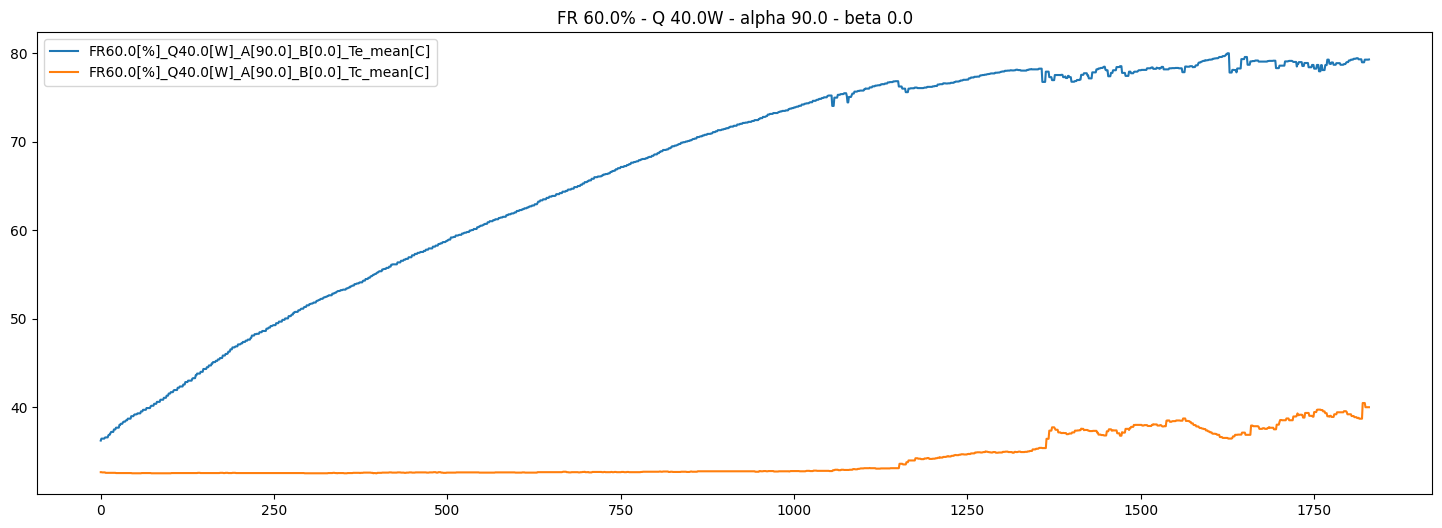

Q 60.0
alpha 90.0, beta 0.0


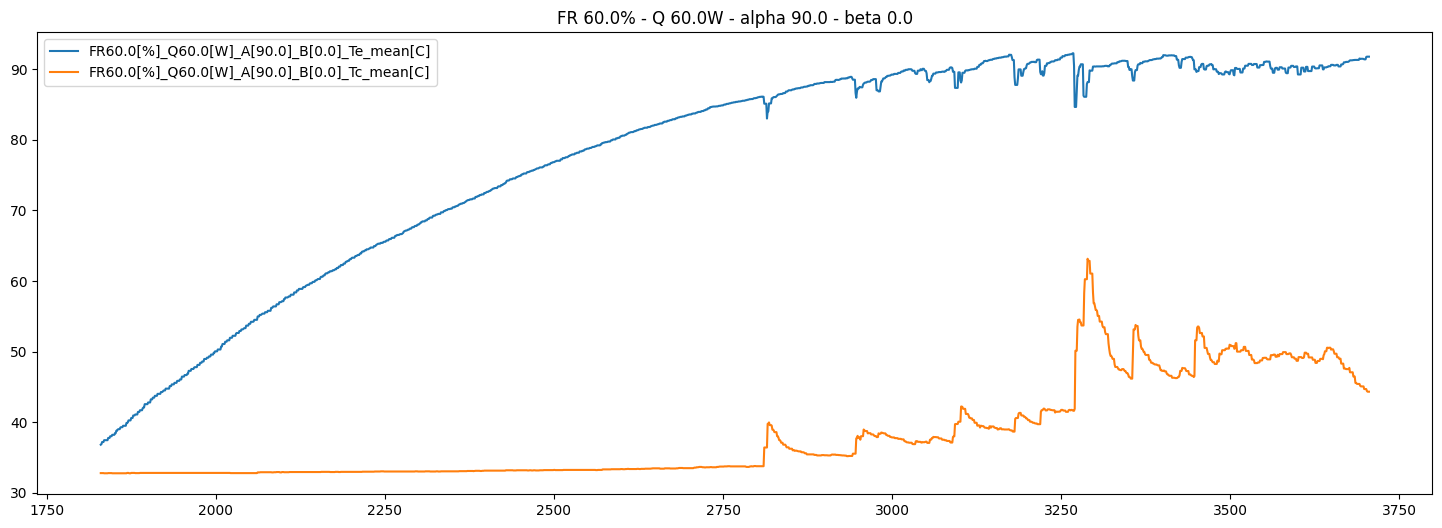

Q 80.0
alpha 90.0, beta 0.0


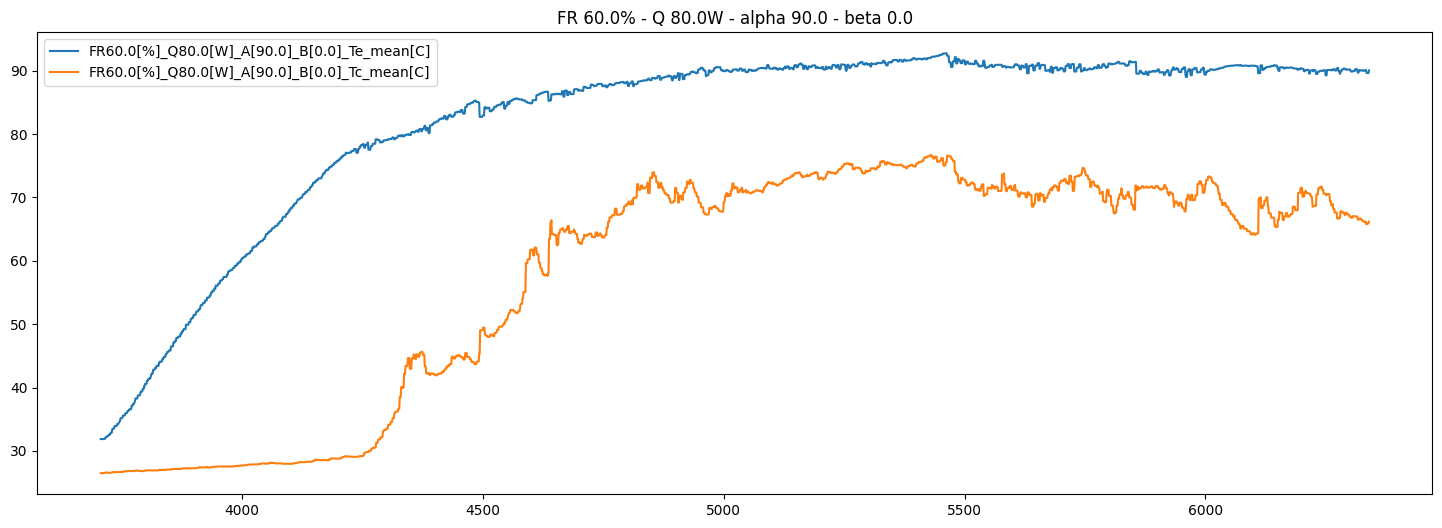

Q 100.0
alpha 90.0, beta 0.0


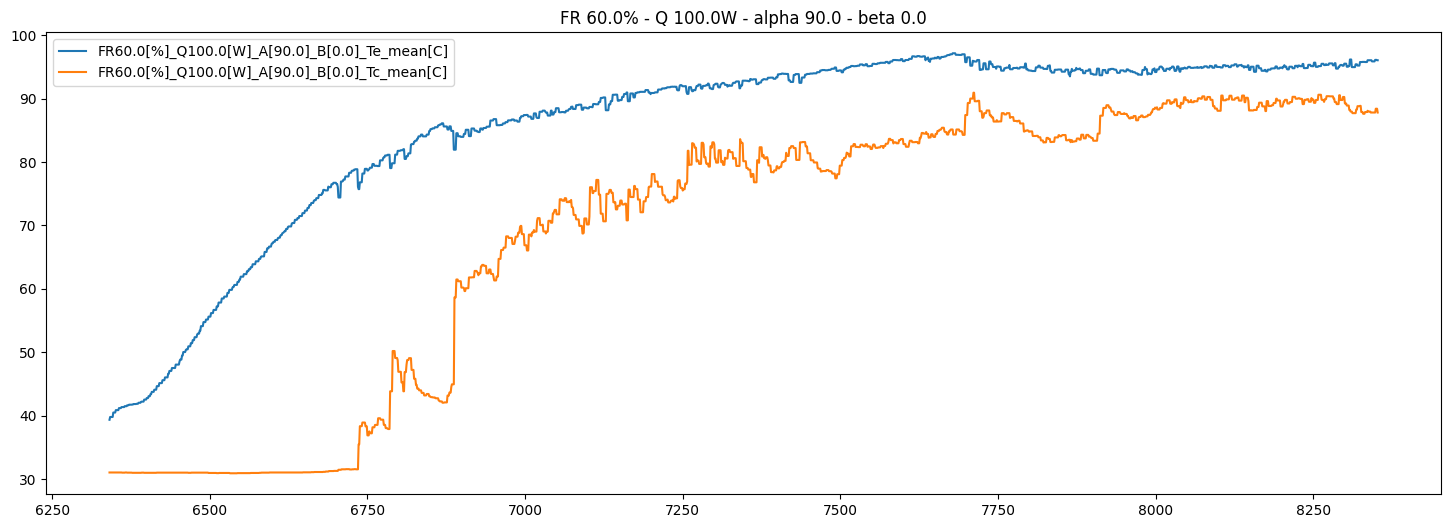

Q 120.0
alpha 90.0, beta 0.0


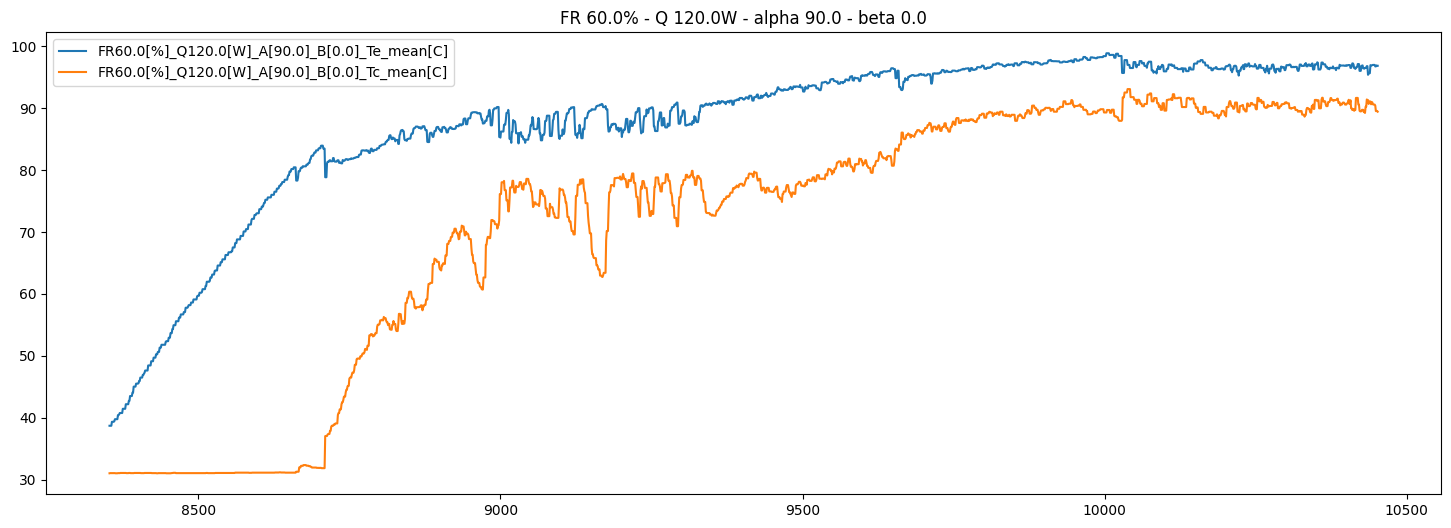

In [11]:
import matplotlib.pyplot as plt

# Assuming frs, qs, alphas, betas are defined and df is your DataFrame
plt.figure(figsize=(18, 9))
for fr in frs:
    print(f'FR {fr}')
    for q in qs:
        print(f'Q {q}')
        for a in alphas:
            for b in betas:
                print(f'alpha {a}, beta {b}')
                
                # Filter the dataframe
                df_ = df[(df['FR[%]'] == fr) & (df['Q[W]'] == q) & (df['alpha'] == a) & (df['beta'] == b)]
                
                if not df_.empty:
                    # Plotting
                    plt.figure(figsize=(18, 6))
                    plt.plot(df_['Te_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Te_mean[C]')
                    plt.plot(df_['Tc_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Tc_mean[C]')
                    plt.legend()
                    plt.title(f'FR {fr}% - Q {q}W - alpha {a} - beta {b}')
                    plt.show()


In [9]:
import pygwalker as pyg
from pygwalker.api.streamlit import StreamlitRenderer
import streamlit as st
from streamlit.components.v1 import components

In [22]:
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S')

In [12]:
st.set_page_config(page_title='Pulsating Heat Pipe - Data Visualization Dash-Board',
                   layout='wide')
st.title('PHP')

pyg_html = pyg.walk(dataset=df, return_html=True)


Box(children=(HTML(value='\n<div id="ifr-pyg-00061d1d6be1f6d3TPDEF9CWzIys0fGi" style="height: auto">\n    <hea…

In [ ]:
import matplotlib.pyplot as plt

# Assuming frs, qs, alphas, betas are defined and df is your DataFrame
plt.figure(figsize=(18, 9))
for fr in frs:
    print(f'FR {fr}')
    for q in qs:
        print(f'Q {q}')
        for a in alphas:
            for b in betas:
                print(f'alpha {a}, beta {b}')
                
                # Filter the dataframe
                df_ = df[(df['FR[%]'] == fr) & (df['Q[W]'] == q) & (df['alpha'] == a) & (df['beta'] == b)]
                
                if not df_.empty:
                    # Plotting
                    plt.figure(figsize=(18, 6))
                    plt.plot(df_['Te_mean[C]'], df_[] label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Te_mean[C]')
                    plt.plot(df_['Tc_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Tc_mean[C]')
                    plt.legend()
                    plt.title(f'FR {fr}% - Q {q}W - alpha {a} - beta {b}')
                    plt.show()
